In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [62]:
data = pd.read_csv('vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

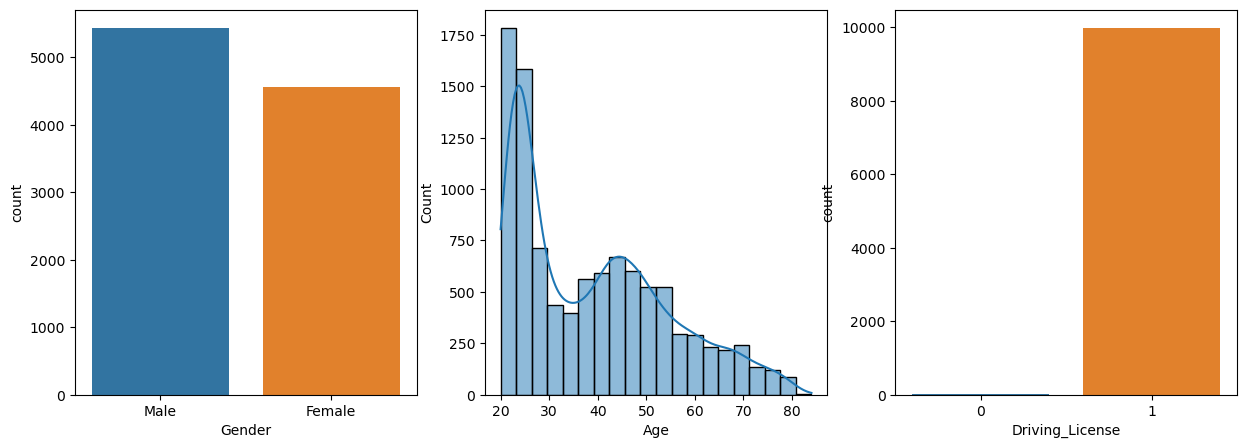

In [63]:
# Распределение пола, возраста и наличия водительского удостоверения
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Gender', data=data, ax=axes[0])
sns.histplot(data['Age'], bins=20, kde=True, ax=axes[1])
sns.countplot(x='Driving_License', data=data, ax=axes[2])
plt.show()


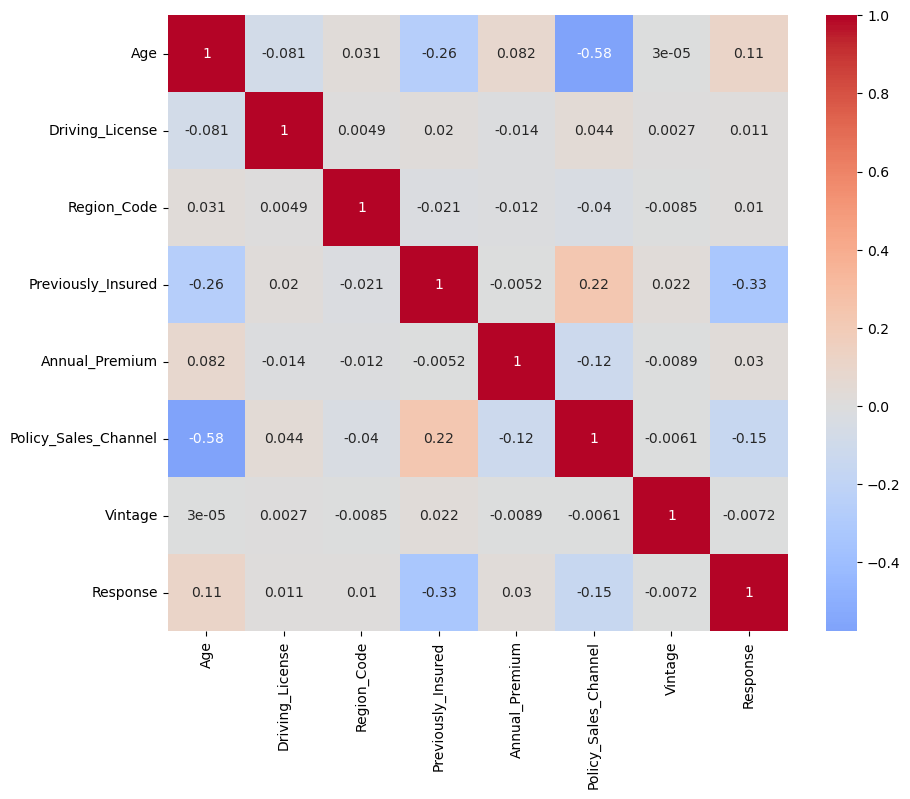

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

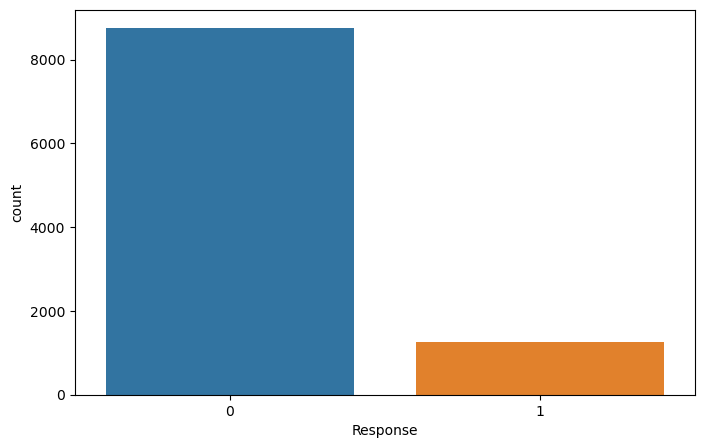

In [65]:
sns.countplot(x='Response', data=data)
plt.show()


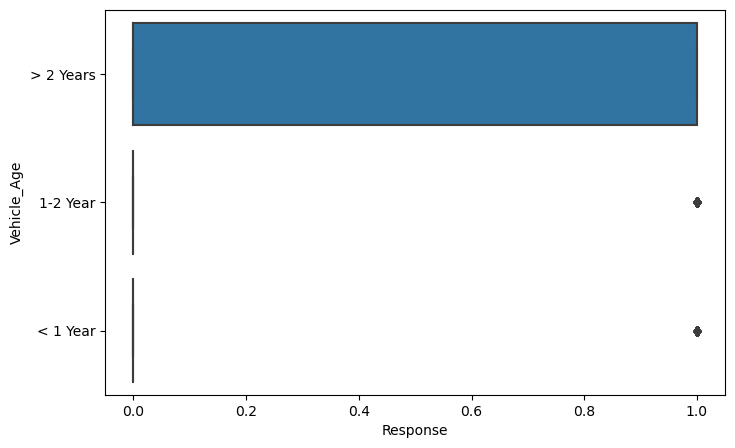

In [66]:
sns.boxplot(x='Response', y='Vehicle_Age', data=data)
plt.show()


In [85]:
# ONE-HOT ENCODING
data = pd.get_dummies(data, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage'], drop_first=True)

KeyError: "None of [Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')] are in the [columns]"

In [86]:
data

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,37.0,1,21243.0,152.0,21,0,0,1,0,0
9996,28,1,35.0,1,23589.0,160.0,173,0,1,1,0,0
9997,27,1,15.0,0,33340.0,152.0,207,0,0,1,0,1
9998,28,1,14.0,1,25426.0,152.0,247,0,0,1,0,0


**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, auc

gb = GradientBoostingClassifier(learning_rate=1, random_state=1, n_estimators=100)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")


Accuracy: 0.8515
F1-score: 0.27027027027027023


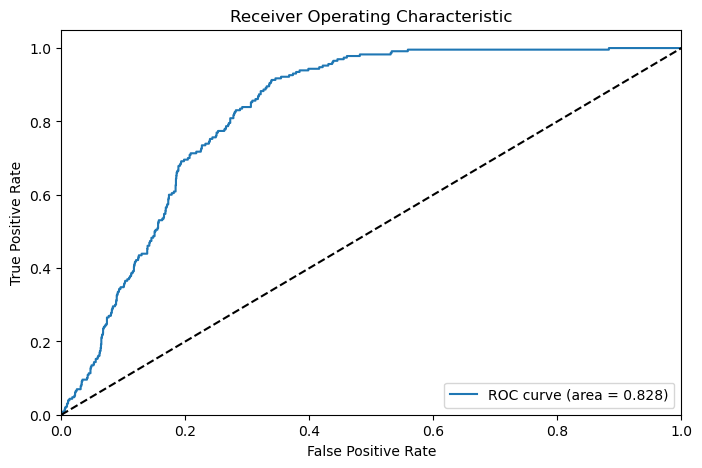

AUC: 0.828


In [70]:
y_pred_proba = gb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.3f}")


**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [71]:
### Задаем сетку параметров
n_estimators_range = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_range = [1, 0.1, 0.01]
results = np.zeros((len(n_estimators_range), len(learning_rate_range)))

Обучаем алгоритмы с различными комбинациями параметров и сохраните результаты f1-score в матрицу

In [73]:
for i, n_estimators in enumerate(n_estimators_range):
    for j, learning_rate in enumerate(learning_rate_range):
        gb = GradientBoostingClassifier(n_estimators=n_estimators, 
                                        learning_rate=learning_rate, 
                                        max_depth=5, 
                                        random_state=1)
        gb.fit(X_train, y_train)
        y_pred = gb.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[i, j] = f1
        
# Округляем матрицу results до 3 знаков после запятой
results = np.round(results, 3)
print(results)

[[0.836 0.832 0.831]
 [0.838 0.832 0.831]
 [0.844 0.832 0.831]
 [0.837 0.832 0.832]
 [0.838 0.838 0.832]
 [0.843 0.843 0.832]
 [0.845 0.843 0.835]
 [0.846 0.846 0.837]]


In [74]:
max_f1 = np.max(results)
print(f"Max F1-score: {max_f1:.3f}")

Max F1-score: 0.846


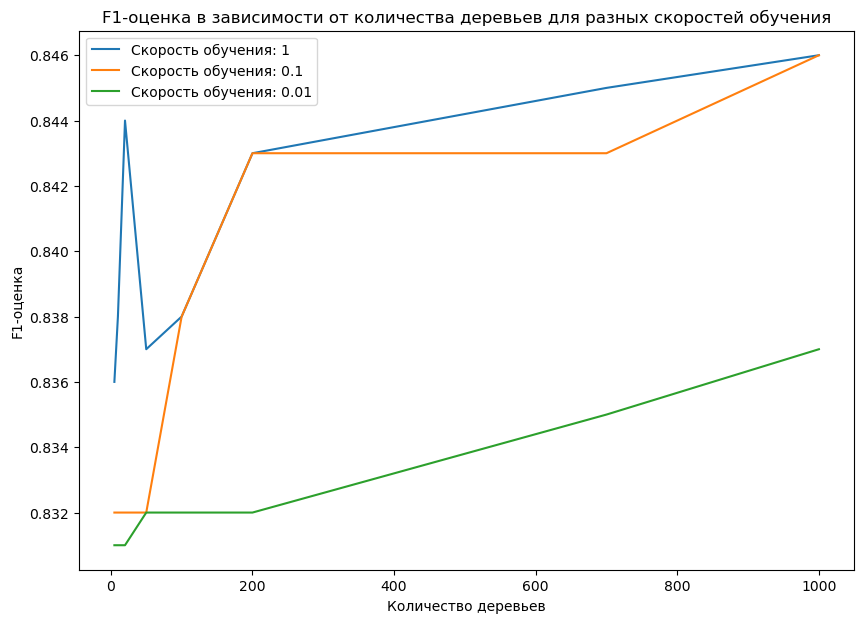

In [75]:
plt.figure(figsize=(10, 7))
for i, learning_rate in enumerate(learning_rate_range):
    plt.plot(n_estimators_range, results[:, i], label=f"Скорость обучения: {learning_rate}")

plt.xlabel("Количество деревьев")
plt.ylabel("F1-оценка")
plt.title("F1-оценка в зависимости от количества деревьев для разных скоростей обучения")
plt.legend()
plt.show()


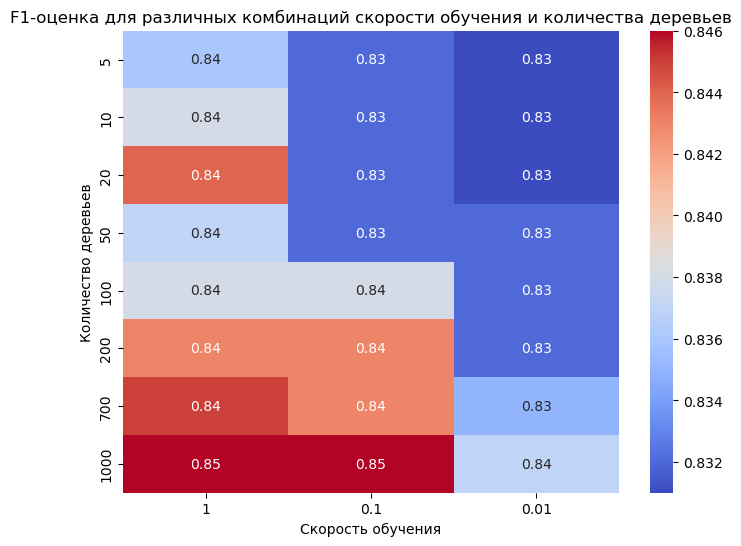

In [76]:
plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, cmap='coolwarm', xticklabels=learning_rate_range, yticklabels=n_estimators_range)
plt.xlabel("Скорость обучения")
plt.ylabel("Количество деревьев")
plt.title("F1-оценка для различных комбинаций скорости обучения и количества деревьев")
plt.show()


**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

In [59]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]


Сначала определим функцию для обучения моделей и вычисления F1-оценки.

In [77]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    f1_train_scores = []
    f1_test_scores = []
    
    for n_estimators in n_estimators_list:
        model.set_params(n_estimators=n_estimators)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        f1_train = f1_score(y_train, y_train_pred, average='weighted')
        f1_test = f1_score(y_test, y_test_pred, average='weighted')

        f1_train_scores.append(f1_train)
        f1_test_scores.append(f1_test)
    
    return f1_train_scores, f1_test_scores


Теперь обучим 4 модели с разными значениями гиперпараметров и нарисуем графики зависимости F1-оценки от количества шагов.

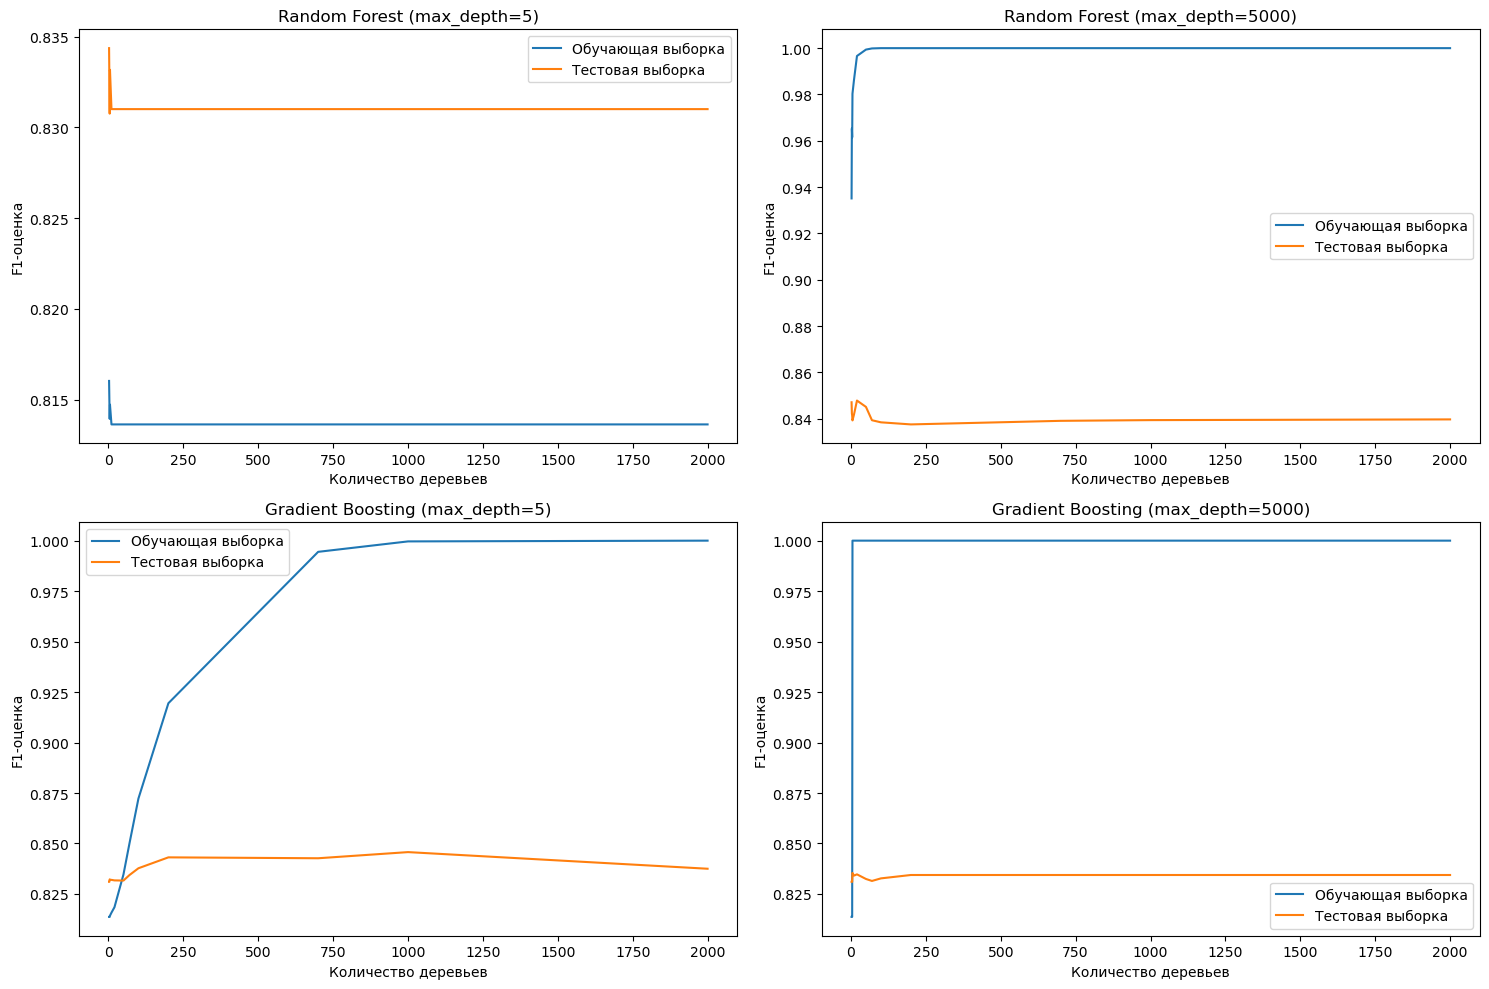

In [78]:
models = [
    RandomForestClassifier(max_depth=5, random_state=1),
    RandomForestClassifier(max_depth=5000, random_state=1),
    GradientBoostingClassifier(max_depth=5, random_state=1),
    GradientBoostingClassifier(max_depth=5000, random_state=1)
]

model_names = [
    "Random Forest (max_depth=5)",
    "Random Forest (max_depth=5000)",
    "Gradient Boosting (max_depth=5)",
    "Gradient Boosting (max_depth=5000)"
]

plt.figure(figsize=(15, 10))

for i, (model, model_name) in enumerate(zip(models, model_names)):
    f1_train_scores, f1_test_scores = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)

    plt.subplot(2, 2, i + 1)
    plt.plot(n_estimators_list, f1_train_scores, label="Обучающая выборка")
    plt.plot(n_estimators_list, f1_test_scores, label="Тестовая выборка")
    plt.xlabel("Количество деревьев")
    plt.ylabel("F1-оценка")
    plt.title(model_name)
    plt.legend()

plt.tight_layout()
plt.show()


**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

CatBoost - это библиотека машинного обучения, разработанная компанией Яндекс. Она использует градиентный бустинг на решающих деревьях и предназначена для работы с табличными данными, в частности с данными, содержащими категориальные признаки. CatBoost оптимизирован для высокой производительности и качества прогнозов.

Вот некоторые особенности CatBoost:

1. **Обработка категориальных признаков**: CatBoost автоматически обрабатывает категориальные признаки без предварительной обработки данных, что облегчает подготовку данных и снижает риск допущения ошибок.
    
2. **Устойчивость к переобучению**: CatBoost имеет встроенные механизмы регуляризации, которые помогают предотвратить переобучение модели. Это делает его эффективным для работы с данными, содержащими много шума или имеющими сложные зависимости.
    
3. **Производительность и масштабируемость**: CatBoost оптимизирован для быстрой работы на больших наборах данных, как на CPU, так и на GPU. Это позволяет обучать сложные модели за приемлемое время, даже если у вас много данных.
    
4. **Интерпретируемость**: CatBoost предоставляет инструменты для анализа важности признаков, что помогает определить, какие переменные важны для модели и как они влияют на прогнозы. Это облегчает интерпретацию результатов и позволяет лучше понять, что влияет на прогнозы модели.
    
5. **Поддержка Python, R и других языков**: CatBoost имеет поддержку нескольких языков программирования, что позволяет легко интегрировать его в различные проекты и рабочие процессы.
    

Для использования CatBoost в Python, вам необходимо установить пакет `catboost` с помощью `pip` или `conda`. Затем вы можете использовать класс `CatBoostClassifier` для решения задач классификации или `CatBoostRegressor` для решения задач регрессии.

In [88]:
# Перезагружаем данные
cat_data = pd.read_csv('vehicle_insurance.csv')

# Определяем признаки и целевую переменную
X = cat_data.drop('Response', axis=1)
y = cat_data['Response']

# 

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [93]:
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state=1, cat_features=['Gender', 'Vehicle_Age', 'Vehicle_Damage'])
catboost.fit(X_train, y_train)

y_pred = catboost.predict(X_test)

# Подсчитываем F1-оценку
print(f"F1-оценка: {f1_score(y_test, y_pred, average='weighted'):.3f}")

Learning rate set to 0.025035
0:	learn: 0.6585225	total: 7.06ms	remaining: 7.05s
1:	learn: 0.6268982	total: 13.6ms	remaining: 6.78s
2:	learn: 0.5928588	total: 18.3ms	remaining: 6.08s
3:	learn: 0.5650766	total: 23.1ms	remaining: 5.75s
4:	learn: 0.5422486	total: 26.5ms	remaining: 5.27s
5:	learn: 0.5180757	total: 32.3ms	remaining: 5.34s
6:	learn: 0.4967701	total: 35.9ms	remaining: 5.1s
7:	learn: 0.4783631	total: 39.3ms	remaining: 4.87s
8:	learn: 0.4615549	total: 43.4ms	remaining: 4.78s
9:	learn: 0.4527304	total: 50.7ms	remaining: 5.02s
10:	learn: 0.4445958	total: 58.1ms	remaining: 5.22s
11:	learn: 0.4300633	total: 69.5ms	remaining: 5.72s
12:	learn: 0.4153701	total: 75.9ms	remaining: 5.76s
13:	learn: 0.4046506	total: 81.7ms	remaining: 5.75s
14:	learn: 0.3953227	total: 86.8ms	remaining: 5.7s
15:	learn: 0.3908375	total: 90.9ms	remaining: 5.59s
16:	learn: 0.3866243	total: 95.7ms	remaining: 5.53s
17:	learn: 0.3780907	total: 100ms	remaining: 5.47s
18:	learn: 0.3711807	total: 107ms	remaining: 5.

In [90]:
### Замерим качество работы такой модели
### Возьмем MSLE

train_preds = catboost.predict(X_train)
test_preds = catboost.predict(X_test)

train_error = np.mean((train_preds - y_train.values.ravel())**2)
test_error = np.mean((test_preds - y_test.values.ravel())**2)


print(f"Качество на трейне: {train_error.round(3)}")
print(f"Качество на тесте: {test_error.round(3)}")

Качество на трейне: 0.094
Качество на тесте: 0.118


In [92]:
# f1 test score, rounded to 3 decimal places
print(f1_score(y_test, test_preds, average='weighted').round(3))

0.841


In [96]:
# Выберите три признака, которые в алгоритме catboost обладают наибольшей важностью
print(catboost.feature_importances_)

# Выпишем названия топ 3 признаков
print(catboost.feature_names_)

[ 3.23807524 11.46580527  0.03653458  8.58680315 28.99594912  4.05248126
 18.24543566  9.71740098  6.67470085  8.98681388]
['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

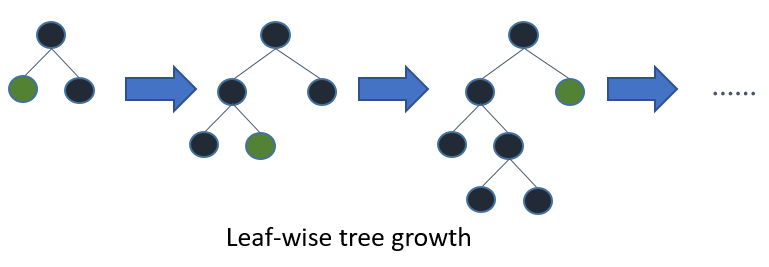

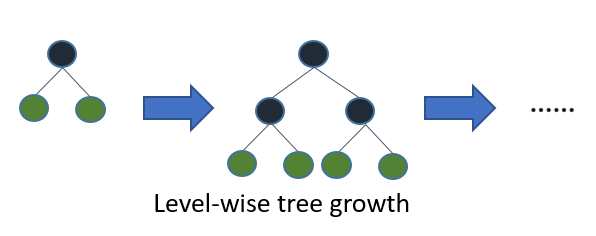

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here


